In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import country_predictor as cp

%matplotlib inline

In [32]:
df = cp.load_data('drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


### Prepping the data by making y the country and X the features

#### X has four feature columns: 
0. beer_servings
1. spirit_servings
2. wine_servings
3. total_litres_of_pure_alcohol

In [15]:
X, y = cp.prep_X_y(df)

###### How do we deal with datasets where there are so many labels?

1. Can't make a train/test split because we will lose some labels.
2. Does random forest take care of this becauase you can check OOB error?

In [33]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

### Testing the prediction with new fake data

In [34]:
X_new = np.array([[92, 100, 12, 3]])

In [35]:
rf.predict(X_new)

array(['Jamaica'], dtype=object)

In [36]:
df[df['country']=='Jamaica']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
84,Jamaica,82,97,9,3.4


### Looks like a reasonable answer but let's look at the error

In [38]:
rf.oob_score_

0.0

That definitely seems wrong. Unfortunately, we don't have test set to cross-validate with. Not sure where to go from here.

### But might as well graph some stuff

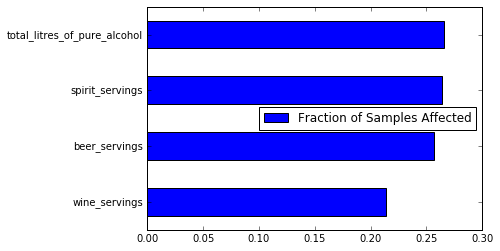

In [42]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=df.drop('country', axis=1).columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh');

### Since there was bagging invovled in the random forest, can we use the original set to test the accuracy?
Definitely doesn't seem right to use the training data as a test.

In [43]:
rf.score(X, y)

0.92746113989637302

Seems like a pretty good accuracy and maybe not overfit? Hard to tell. It definitely isn't getting all of them right...

Ok, let's play with some user input, let's test it to make sure it is calculating correctly using Albania's data

In [47]:
cp.predict_country()

Let's figure out which country your drinking habits belong to...
First, let's look at how much beer you drink:
How many servings of beer do you drink per week? 1.7115384615384615
89.0
Next, let's look at how much hard alcohol (spirits) you drink:
How many servings of hard alcohol do you drink per week? 2.5384615384615383
132.0
Next up, wine time.
How many servings of wine do you drink per week? 1.0384615384615385
54.0
4.8675
Ok, give me a second...
...
...


Cool, look's like it is working finally. Let's add the prediction part

In [52]:
cp.predict_country()


Let's figure out which country your drinking habits belong to...
First, let's look at how much beer you drink:
How many servings of beer do you drink per week? 3
Next, let's look at how much hard alcohol (spirits) you drink:
How many servings of hard alcohol do you drink per week? 3
Next up, wine time.
How many servings of wine do you drink per week? 4
Ok, give me a second...
...
...
Looks like you belong in Greece!
Better pack your things!


### Need to return to this and think about error prediction
